<a href="https://colab.research.google.com/github/pikaybh/SNU-Ambient-AI/blob/main/TF_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Concatenate, Flatten, Add, MaxPooling2D, GlobalAveragePooling2D

# Sequential API

---

`Sequential API`는 각 레이어에 **정확히 하나의 입력 텐서와 하나의 출력 테서**가 있는 **일반 레이어 스택**에 적합

In [ ]:
model_seq1 = tf.keras.Sequential([
    Dense(100),
    Dense(200),
    Dense(300)
])

`add` method


In [ ]:
model_seq2 = tf.keras.Sequential()
model_seq2.add(Dense(100))
model_seq2.add(Dense(200))
model_seq2.add(Dense(300))

# Functional API

---

`Functional API`는 `Sequential API`보다 더 유연한 모델을 만들 수 있다.


In [ ]:
inputs = Input(shape = (784))  # 먼저 input layer를 만듦. shape는 임읠 설정
x = Dense(100)(inputs)  # 각 layer의 output을 다음 layer의 input으로 넣음
x = Dense(200)(x)
outputs = Dense(300)(x)

model_func = tf.keras.Model(inputs=inputs, outputs=outputs)  # 마지막엔 tf.keras.Model을 이용

# Residual Connection

---

Residual connection은 특정 layer의 output이 이후의 몇개 layer를 통과하지 않고 우회하는 connection.

豫 Dense layer의 node 갯수는 100개, ReLu Activation을 사용

In [ ]:
inputs = Input(shape = (28, 28, 1))

x = Dense(100, activation='relu')(inputs)

# 우회
shortcut = x

# 비우회
x = Dense(100, activation='relu')(x)
x = Dense(100, activation='relu')(x)

# 집결
# outputs = x + shortcut
outputs = Add()([x, shortcut])

model_res = tf.keras.Model(inputs=inputs, outputs=outputs)

# 시각화

In [ ]:
!pip install pydot pydotplus graphviz  # then kernel restart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


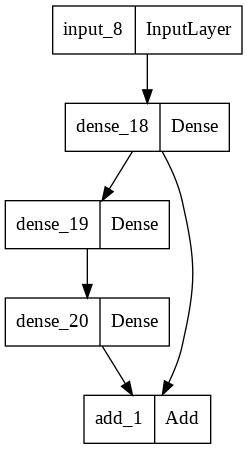

In [ ]:
# This may not work if graphviz is not installed. You need to install by apt-get install
tf.keras.utils.plot_model(model_res, to_file='model_ress.png')

# Multiple inputs / outputs (Inception structure)

---

특정 layer의 output을 여러 layer가 동시에 input으로 이용하는 경우, 여러 layer의 output이 하나의 layer의 input으로 들어가는 경우도 가능

豫 각 Dense layer의 Node의 갯수는 100개고, ReLU Activation을 사용.
단, 마지막 Dense layer는 Softmax activation을 사용

In [ ]:
inputs = Input(shape = (28, 28, 1))

x1 = Dense(100, activation='relu')(inputs)

# 첫 단계
x1_1_1 = Dense(100, activation='relu')(x1)
x1_2_1 = Dense(100, activation='relu')(x1)
x1_3_1 = Dense(100, activation='relu')(x1)

# 두번째 단계
x1_1_2 = Dense(100, activation='relu')(x1_1_1)
x1_2_2 = Dense(100, activation='relu')(x1_2_1)
x1_3_2 = Dense(100, activation='relu')(x1_3_1)

# 집결
# outputs = x + shortcut
x = Concatenate(axis=-1)([x1_1_2, x1_2_2, x1_3_2])
x = Flatten()(x)
outputs = Dense(10, activation='softmax')(x)

model_multi = tf.keras.Model(inputs=inputs, outputs=outputs)

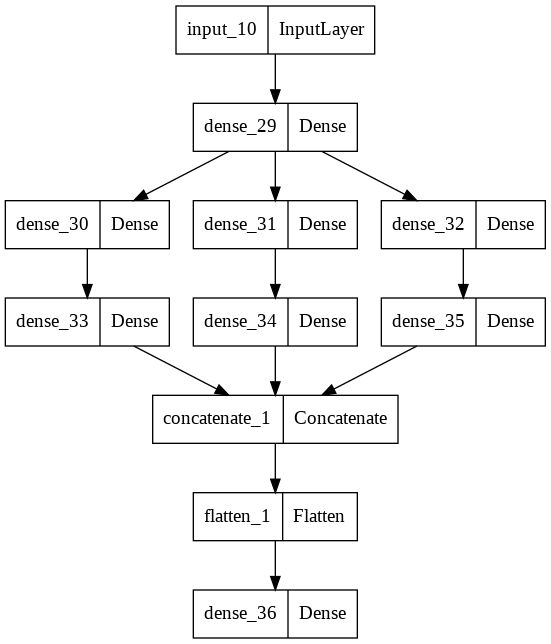

In [ ]:
tf.keras.utils.plot_model(model_multi, to_file='model_multi.png')

# Sharing Layer

In [ ]:
# 공유할 layer
layer_share = Dense(100, activation='relu', name='foo')

# Model 1
inputs1 = Input(shape=(28, 28, 1))

x1 = Dense(1000, activation='relu')(inputs1)
x1 = layer_share(x1)
x1 = Dense(1000, activation='relu')(x1)
outputs1 = Dense(10, activation='softmax')(x1)

model1 = tf.keras.Model(inputs=inputs1, outputs=outputs1)

# Model 2
inputs2 = Input(shape=(32, 32, 1))

x2 = Dense(1000, activation='relu')(inputs2)
x2 = layer_share(x2)
x2 = Dense(1000, activation='relu')(x2)
outputs2 = Dense(10, activation='softmax')(x2)
 
model2 = tf.keras.Model(inputs=inputs2, outputs=outputs2)

model = tf.keras.Model(inputs=[inputs1, inputs2], outputs=[outputs1, outputs2])

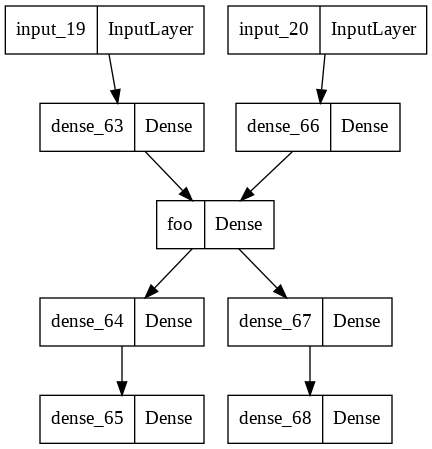

In [ ]:
tf.keras.utils.plot_model(model, to_file='model_multi.png') 

# 간단한 ResNet 구현

---

MLP layer만을 간단하게 구현한 ResNet-11 모델의 구조

`ResBlock` 하수를 작성한 다음 `ResNet11`함수를 이용하여 ResNet-11를 구현
- 조건1: 1번째 ResBlock의 node는 100개, 2·3번째 ResBlock의 node는 200개를 사용
- 조건2: 마지막 Layer의 node 수는 10개
- 조건3: Activation은 모두 ReLU를 사용.
단, 마지막 layer에서는 Sortmax activation을 사용

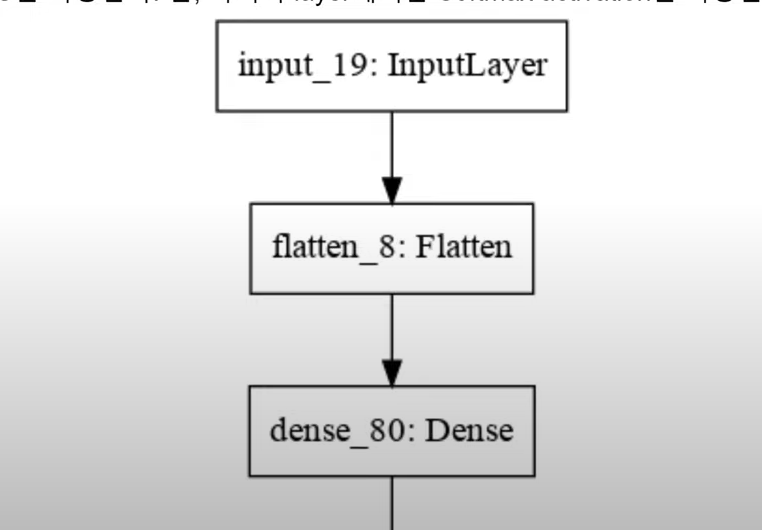




In [ ]:
def ResBlock(x, nodes):
  # 우회
  shortcut = x

  # 비우회
  x = Dense(nodes, activation='relu')(x)
  x = Dense(nodes, activation='relu')(x)

  # 집결
  # outputs = x + shortcut
  x = Add()([x, shortcut])

  return x

In [ ]:
def ResNet11():
  inputs = Input(shape=(224, 224, 3))
  x = Flatten()(inputs)
  x = Dense(100)(x)

  x = ResBlock(x, 100)
  x = ResBlock(x, 100)
  x = ResBlock(x, 100)
  
  outputs = Dense(10, activation='softmax')(x)
  
  return tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
resnet11 = ResNet11()

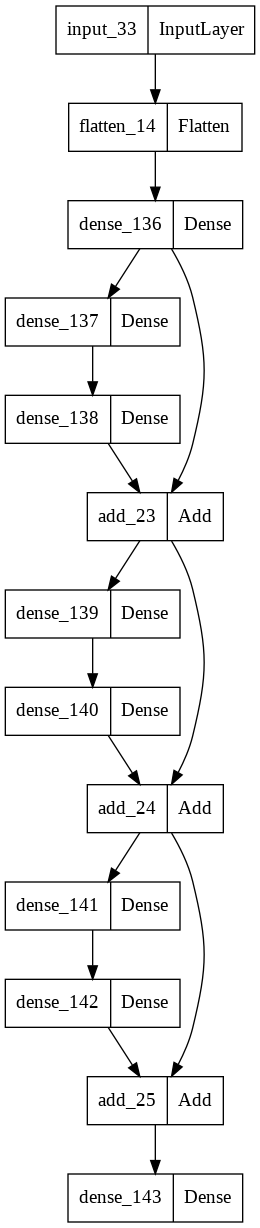

In [ ]:
tf.keras.utils.plot_model(resnet11, to_file='resnet11.png') 